# Содержание:
Подготовила: ***Удачина Анастасия***
- [Наивный алгоритм](#cell1):
- [Алгоритм Рабина-Карпа](#cell2)   
- [Алгоритм Бойера-Мура-Хорспула](#cell3)
- [Алгоритм Кнутта-Мориса-Пратта](#cell4)
- [Алгоритм  Ахо-Корасика](#cell5)

- [Анализ работы алгоритмов](#cell6)


In [430]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import codecs
from time import perf_counter
from copy import deepcopy

<a id="cell1"></a>
<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Наивный алгоритм</center></h2></div>
    <a id="cell2"></a>

In [431]:
def nSearch(text, pattern):
    
    if len(text)==0 or len(pattern)==0 or len(text)<len(pattern):
        return -1
    lenT,lenP,match=len(text),len(pattern),[]
    oper=0 #кол-во операций
    for tInd in range(lenT-lenP + 1):
        pInd=0
        while pInd<lenP:
            oper+=1
            if (text[tInd+pInd]!=pattern[pInd]): break
            pInd+=1
            if pInd==lenP : match.append(tInd)
    return match,oper

In [432]:
#тест
nSearch('Abcdbcbcbc','bc')

([1, 4, 6, 8], 13)

 <a id="cell2"></a>
<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Алгоритм Рабина-Карпа</center></h2></div>
    <a id="cell2"></a>

In [433]:
def rkSearch(text,pattern):
    if len(text)==0 or len(pattern)==0 or len(text)<len(pattern):
        return -1
    d , q, h, p, t= 256, 97, 1, 0, 0 #(alphabet&&args sizes&& hash&& hash pattern&& hash text)
    oper=0 #кол-во операций
    lenT,lenP, match=len(text),len(pattern),[]
    for i in range(lenP-1): h=(h*d) % q
    for i in range(lenP):
        p, t = (d * p + ord(pattern[i])) % q,(d * t + ord(text[i])) % q
    for i in range(lenT-lenP+1):
        oper+=1
        if p==t:
            for j in range(lenP):
                oper+=1
                if text[i+j]!=pattern[j]: break
                else: j+=1
            if j==lenP:
                match.append(i)
        if i<lenT-lenP:
            t = (d*(t - ord(text[i])*h) + ord(text[i+lenP]))%q
            if (t < 0):
                t = (t + q)
    return match,oper

In [434]:
#тест
rkSearch('Abcdbcbcbc','bc')

([1, 4, 6, 8], 17)

 <a id="cell3"></a>
 
<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Алгоритм Бойера-Мура-Хорспула</center></h2></div>
    <a id="cell2"></a>

In [435]:
def bmhSearch(text,pattern):
    if len(text)==0 or len(pattern)==0 or len(text)<len(pattern):
        return -1
    oper=0 #кол-во операций
    def getImg(k):
        len_ = len(k)
        imgDct={i: len_ for i in range(2048)}
        for idx, char in enumerate(k[:-1], start=1): imgDct[ord(char)] = len_-idx
        return imgDct
    
    lenT,lenP, match=len(text),len(pattern),[]
 
    imgDct = getImg(pattern)
    i,j,pMatch =lenP,lenP, lenP
    while i <= lenT:
        oper+=1
        if text[i-1] == pattern[j-1] and j>0: i,j=-1, -1
        else:
            if j == -1:
                match.append(pMatch - lenP)
            
            pMatch += imgDct[ord(text[i-1])]
            i, j = deepcopy(pMatch),lenP
    
    return match,oper

In [436]:
#тест
bmhSearch('Abcdbcbcbc','bc')

([1, 4, 6, 8], 12)

 <a id="cell4"></a>

<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Алгоритм Кнутта-Мориса-Пратта</center></h2></div>
    <a id="cell2"></a>

In [437]:
def kmpSearch(text,pattern):
    if len(text)==0 or len(pattern)==0 or len(text)<len(pattern):
        return -1
    oper=0 #кол-во операций
    def cpreFu(pattern):
        len_=len(pattern)
        mass=[0] * len_
        for i in range(1,len_):
            k=mass[i-1]
            while k>0 and pattern[k+1]!=pattern[i]:
                k=mass[k-1]
            if pattern[k+1]==pattern[i]: k=k+1
            mass[i]=k
        return mass
    
    lenT,lenP, match=len(text),len(pattern),[]
    mass= cpreFu(pattern)
    tInd,pInd=0,0
    
    while tInd<lenT and pInd<lenP:
        oper+=1
        if text[tInd]==pattern[pInd]:
            if pInd==lenP-1:
                match.append(tInd-lenP+1)
                pInd=0
            else: pInd+=1
            tInd+=1
        elif pInd!=0: pInd=mass[pInd-1]
        else: tInd+=1
        
        
    return match,oper

In [438]:
kmpSearch('Abcdbcbcbc','bc')

([1, 4, 6, 8], 10)

 <a id="cell5"></a>
<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Алгоритм  Ахо-Корасика</center></h2></div>
    <a id="cell2"></a>

In [439]:
def acSearch(text, pattern):
    if len(text)==0 or len(pattern)==0 or len(text)<len(pattern):
        return -1
    acExample = acClass(pattern)
    return acExample.search(text)

In [440]:
class acClass:
    def __init__(self, patterns):
        self.connections = {}
        self.fake_links = {}
        self.outputs = {}

        self.createBOR(patterns)
        self.createLinks()

    def addPattern(self, pattern):
        root = 0
        for j, char in enumerate(pattern):
            res = self.connections.get((root, char), -1)
            if res == -1:
                break
            root = res
        for char in pattern[j:]:
            self.root_ += 1
            self.connections[(root, char)] = self.root_
            root = self.root_
        self.outputs[root] = [pattern]

    def createBOR(self, patterns):
        self.root_ = 0
        if not isinstance(patterns, list):  self.addPattern(patterns)
        else:
            for pattern in patterns:  self.addPattern(pattern)
               

    def createLinks(self):
        mass = []
        for (past, char), to in self.connections.items():
            if past == 0 and to != 0:
                mass.append(to)
                self.fake_links[to] = 0
        while mass:
            tmp = mass.pop(0)
            for (past, char), to in self.connections.items():
                if past == tmp:
                    mass.append(to)
                    state = self.fake_links[past]
                    while 1:
                        result = self.connections.get((state, char), state and -1)
                        if result != -1:
                            break
                        state = self.fake_links[state]

                    fake = self.connections.get((state, char), state and -1)
                    self.fake_links[to] = fake
                    self.outputs.setdefault(to, []).extend(self.outputs.get(fake, []))

    def search(self, text):
        root,match = 0,[]
        
        oper=0
        for (i, char) in enumerate(text):
            while 1:
                result = self.connections.get((root, char), root and -1)
                oper+=1
                if result != -1: 
                    root = result
                    
                    break
                root = self.fake_links[root]

            for pattern in self.outputs.get(root, []):
                indx = i - len(pattern) + 1
                match.append(indx)

        return match,oper
    

In [441]:
#тест
acSearch('Abcdbcbcbc','bc')

([1, 4, 6, 8], 13)

<a id="cell6"></a>
<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; 
            background-color:DeepSkyBlue;"><h2><center>Анализ работы алгоритмов </center></h2></div>
            <a id="cell1"></a>

In [442]:
BENCH_DIR = 'C:/Users/AUdachina/Desktop/own/benchmarks/'

In [443]:
all_methods = [nSearch, rkSearch, bmhSearch, kmpSearch,acSearch]
bad_patterns = []
bad_texts = []
good_patterns = []
good_texts = []
bad_files = []
good_files = []
for i in range(1,5):
    bad_files.append('bad_t_' + str(i) +'.txt')
    good_files.append( 'good_t_' + str(i) +'.txt')

    with codecs.open(BENCH_DIR + '/' + bad_files[-1], 'r','utf_8_sig') as file:
        bad_texts.append(file.read())
    with codecs.open(BENCH_DIR + '/bad_w_' + str(i) +'.txt', 'r','utf_8_sig') as file:
        bad_patterns.append(file.read())
    with codecs.open(BENCH_DIR + '/' +good_files[-1], 'r','utf_8_sig') as file:
        good_texts.append(file.read())
    with codecs.open(BENCH_DIR + '/bad_w_' + str(i) +'.txt', 'r','utf_8_sig') as file:
        good_patterns.append(file.read())

In [444]:
def get_median(time_list, sorted = True):
    if len(time_list) is 0:
        return NaN
    if not sorted:
        time_list.sort()
    if len(time_list) % 2 == 0:
        return (time_list[int(len(time_list)/2)] + time_list[int(1 + len(time_list)/2)]) / 2
    else:
        return time_list[int(len(time_list)/2)]


def get_min(time_list, sorted = True):
    if len(time_list) is 0:
        return NaN 
    if not sorted:
        time_list.sort()  
    return time_list[0]


def get_max(time_list, sorted = True):
    if len(time_list) is 0:
        return NaN 
    if not sorted:
        time_list.sort()  
    return time_list[-1]

def get_variance(time_list):
    if len(time_list) is 0:
        return NaN 
    mean = sum(time_list) / len(time_list) 
    variance = sum([((x - mean) ** 2) for x in time_list]) / len(time_list)
    return variance

def get_mean(time_list):
    if len(time_list) is 0:
        return NaN 
    mean = sum(time_list) / len(time_list) 
    return mean

In [445]:
def get_time_df(num_iterations = 10, methods = [nSearch], len_cases = 4 ):
    time_total = pd.DataFrame(columns=['file', 'method', 'mean', 'median', 'min', 'max', 'variance'])
    df_index = 0
    for i in range(0, len_cases):
        for method in methods:
            time_good = []
            time_bad = []
            for j in range(0, num_iterations):
                t0 = time.time()
                method(good_patterns[i], good_texts[i])
                t1 = time.time()
                total = t1-t0
                time_good.append(total)

                t0 = time.time()
                method(bad_patterns[i], bad_texts[i])
                t1 = time.time()
                total = t1-t0
                time_bad.append(total)
            time_good.sort()
            time_bad.sort()
            time_total.loc[df_index] = [good_files[i], str(method.__name__), get_mean(time_good),
                                         get_median(time_good), get_min(time_good), get_max(time_good), get_variance(time_good)]
            time_total.loc[df_index + 1] = [bad_files[i], str(method.__name__), get_mean(time_bad),
                                             get_median(time_bad), get_min(time_bad), get_max(time_bad), get_variance(time_bad)]
            df_index += 2
    return time_total

In [446]:
time_df = get_time_df(num_iterations=1000, methods = all_methods)
time_df

,file,method,mean,median,min,max,variance
0,good_t_1.txt,nSearch,9.970665e-07,0.0,0.0,0.000997,9.931475e-10
1,bad_t_1.txt,nSearch,0.000000e+00,0.0,0.0,0.000000,0.000000e+00
2,good_t_1.txt,rkSearch,9.946823e-07,0.0,0.0,0.000995,9.884035e-10
3,bad_t_1.txt,rkSearch,1.024008e-06,0.0,0.0,0.001024,1.047543e-09
4,good_t_1.txt,bmhSearch,1.025200e-06,0.0,0.0,0.001025,1.049984e-09
5,bad_t_1.txt,bmhSearch,0.000000e+00,0.0,0.0,0.000000,0.000000e+00
6,good_t_1.txt,kmpSearch,9.953976e-07,0.0,0.0,0.000995,9.898255e-10
7,bad_t_1.txt,kmpSearch,0.000000e+00,0.0,0.0,0.000000,0.000000e+00
8,good_t_1.txt,acSearch,9.977818e-07,0.0,0.0,0.000998,9.945729e-10
9,bad_t_1.txt,acSearch,9.963512e-07,0.0,0.0,0.000996,9.917231e-10


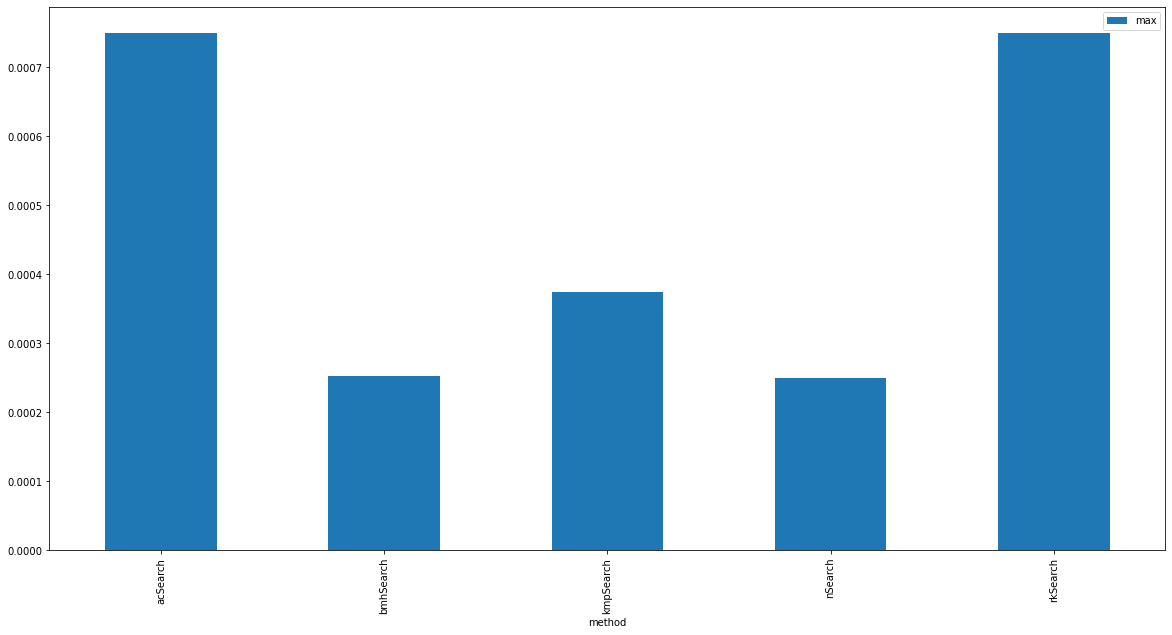

In [447]:
#если рассматривать все случаи сразу
time_df.groupby(['method']).agg({'max':'mean'}).plot.bar(figsize=(20,10))
plt.show()

In [450]:
results = pd.DataFrame(columns=['Filename', 'method', 'oper'])
algo = {nSearch: 'Наивный', rkSearch: 'Рабина-Карпа',
             bmhSearch: 'Бойера-Мура-Хорспула', kmpSearch: 'Кнута-Морриса-Пратта',
             acSearch: 'Ахо-Корасика'}

def measure_function(fun, text, pattern, expected, filename, iterations=10):
    global results
    total_time = 0
    for i in range(iterations):
        start = perf_counter()
        result = fun(text, pattern)
        end = perf_counter()
        total_time += (end - start)
    total_time /= iterations
    results = results.append({'Filename': filename, 'method': algo[fun],
                              'oper': result[1]}, ignore_index=True)
    
def test(text, pattern, filename):
    expected = nSearch(text, pattern)[0]
    measure_function(nSearch, text, pattern, expected, filename)
    measure_function(rkSearch, text, pattern, expected, filename)
    measure_function(bmhSearch, text, pattern, expected, filename)
    measure_function(kmpSearch, text, pattern, expected, filename)
    measure_function(acSearch, text, pattern, expected, filename)
    
def start_testing():
    for bench_type in ['bad', 'good']:
        for i in range(1, 5):
            text = codecs.open(f"benchmarks/{bench_type}_t_{i}.txt", "r", "utf_8_sig")
            pattern = codecs.open(f"benchmarks/{bench_type}_w_{i}.txt", "r", "utf_8_sig")
            test(text.read(), pattern.read(), f"{bench_type}_{i}")
start_testing()
results

,Filename,method,oper
0,bad_1,Наивный,18
1,bad_1,Рабина-Карпа,11
2,bad_1,Бойера-Мура-Хорспула,10
3,bad_1,Кнута-Морриса-Пратта,18
4,bad_1,Ахо-Корасика,18
5,bad_2,Наивный,910
6,bad_2,Рабина-Карпа,101
7,bad_2,Бойера-Мура-Хорспула,92
8,bad_2,Кнута-Морриса-Пратта,190
9,bad_2,Ахо-Корасика,190
